## Importing the Necessary Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
from pylab import rcParams

## Read Datasets

In [2]:
def read_train():
    df_train = pd.read_csv("data/Train.csv")
    return df_train

In [3]:
def read_test():
    df_test =pd.read_csv("data/Test.csv")
    return df_test

In [4]:
def read_sub():
    df_sub =pd.read_csv("data/SampleSubmission.csv")
    return df_sub

In [5]:
def read_riders():
    df_riders =pd.read_csv("data/Riders.csv")
    return df_riders

In [6]:
def read_definitions():
    df_definitions = pd.read_csv("data/VariableDefinitions.csv")
    return df_definitions

In [7]:
train_df = read_train()
test_df = read_test()
riders_df = read_riders()
submission_df = read_sub()
var_df = read_definitions()


In [8]:
train_df.shape , test_df.shape ,riders_df.shape

((21201, 29), (7068, 25), (960, 5))

In [9]:
train_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [10]:
train_df.sample(5)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
14586,Order_No_19096,User_Id_1131,Bike,3,Business,26,5,10:37:53 AM,26,5,...,11:22:33 AM,15,NaN,NaN,-1.286904,36.824006,-1.207546,36.791398,Rider_Id_456,1718
2631,Order_No_23655,User_Id_3222,Bike,3,Business,6,2,10:15:57 AM,6,2,...,11:09:38 AM,11,25.0,NaN,-1.255189,36.782203,-1.323350,36.813916,Rider_Id_726,1955
12237,Order_No_15747,User_Id_2383,Bike,3,Business,3,3,9:28:58 AM,3,3,...,10:00:35 AM,2,21.5,NaN,-1.260899,36.799246,-1.251639,36.811489,Rider_Id_487,490
16095,Order_No_19380,User_Id_3517,Bike,3,Business,30,4,1:59:04 PM,30,4,...,3:05:13 PM,15,NaN,NaN,-1.300921,36.828195,-1.388201,36.769945,Rider_Id_211,2330
1132,Order_No_22372,User_Id_3450,Bike,3,Business,15,5,9:52:21 AM,15,5,...,10:56:50 AM,8,20.3,NaN,-1.255189,36.782203,-1.280291,36.829654,Rider_Id_311,2331


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [12]:
train_df.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

  Quite a number of missing values in  the **Precipitation in millimeters**  column and  moderate number in  **Temperature** 

In [13]:
train_df.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

In [14]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Platform Type,21201.0,2.752182,0.625178,1.000000,3.000000,3.000000,3.000000,4.000000
Placement - Day of Month,21201.0,15.653696,8.798916,1.000000,8.000000,15.000000,23.000000,31.000000
Placement - Weekday (Mo = 1),21201.0,3.240083,1.567295,1.000000,2.000000,3.000000,5.000000,7.000000
Confirmation - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000
Confirmation - Weekday (Mo = 1),21201.0,3.240225,1.567228,1.000000,2.000000,3.000000,5.000000,7.000000
Arrival at Pickup - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000
Arrival at Pickup - Weekday (Mo = 1),21201.0,3.240225,1.567228,1.000000,2.000000,3.000000,5.000000,7.000000
Pickup - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000
Pickup - Weekday (Mo = 1),21201.0,3.240225,1.567228,1.000000,2.000000,3.000000,5.000000,7.000000
Arrival at Destination - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000


In [15]:
riders_df.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


#### Lets merge the riders table with the train_df and the test_df 

In [16]:
train = train_df.merge(riders_df, how="left" ,on="Rider Id")

In [17]:
test = test_df.merge(riders_df ,how="left",on="Rider Id")

##  Basic Exploratory Data Analysis

In [18]:
test.shape ,train.shape

((7068, 29), (21201, 33))

In [19]:
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,886,283,14.5,113
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2311,872,14.1,533


In [20]:
test.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192,439,1511,13.3,171
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868,488,273,14.4,45
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26,833,460,13.1,67
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685,487,560,13.7,44
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858,4761,1120,14.1,1010


In [21]:
train.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings'],
      dtype='object')

In [22]:
train.duplicated().any()

False

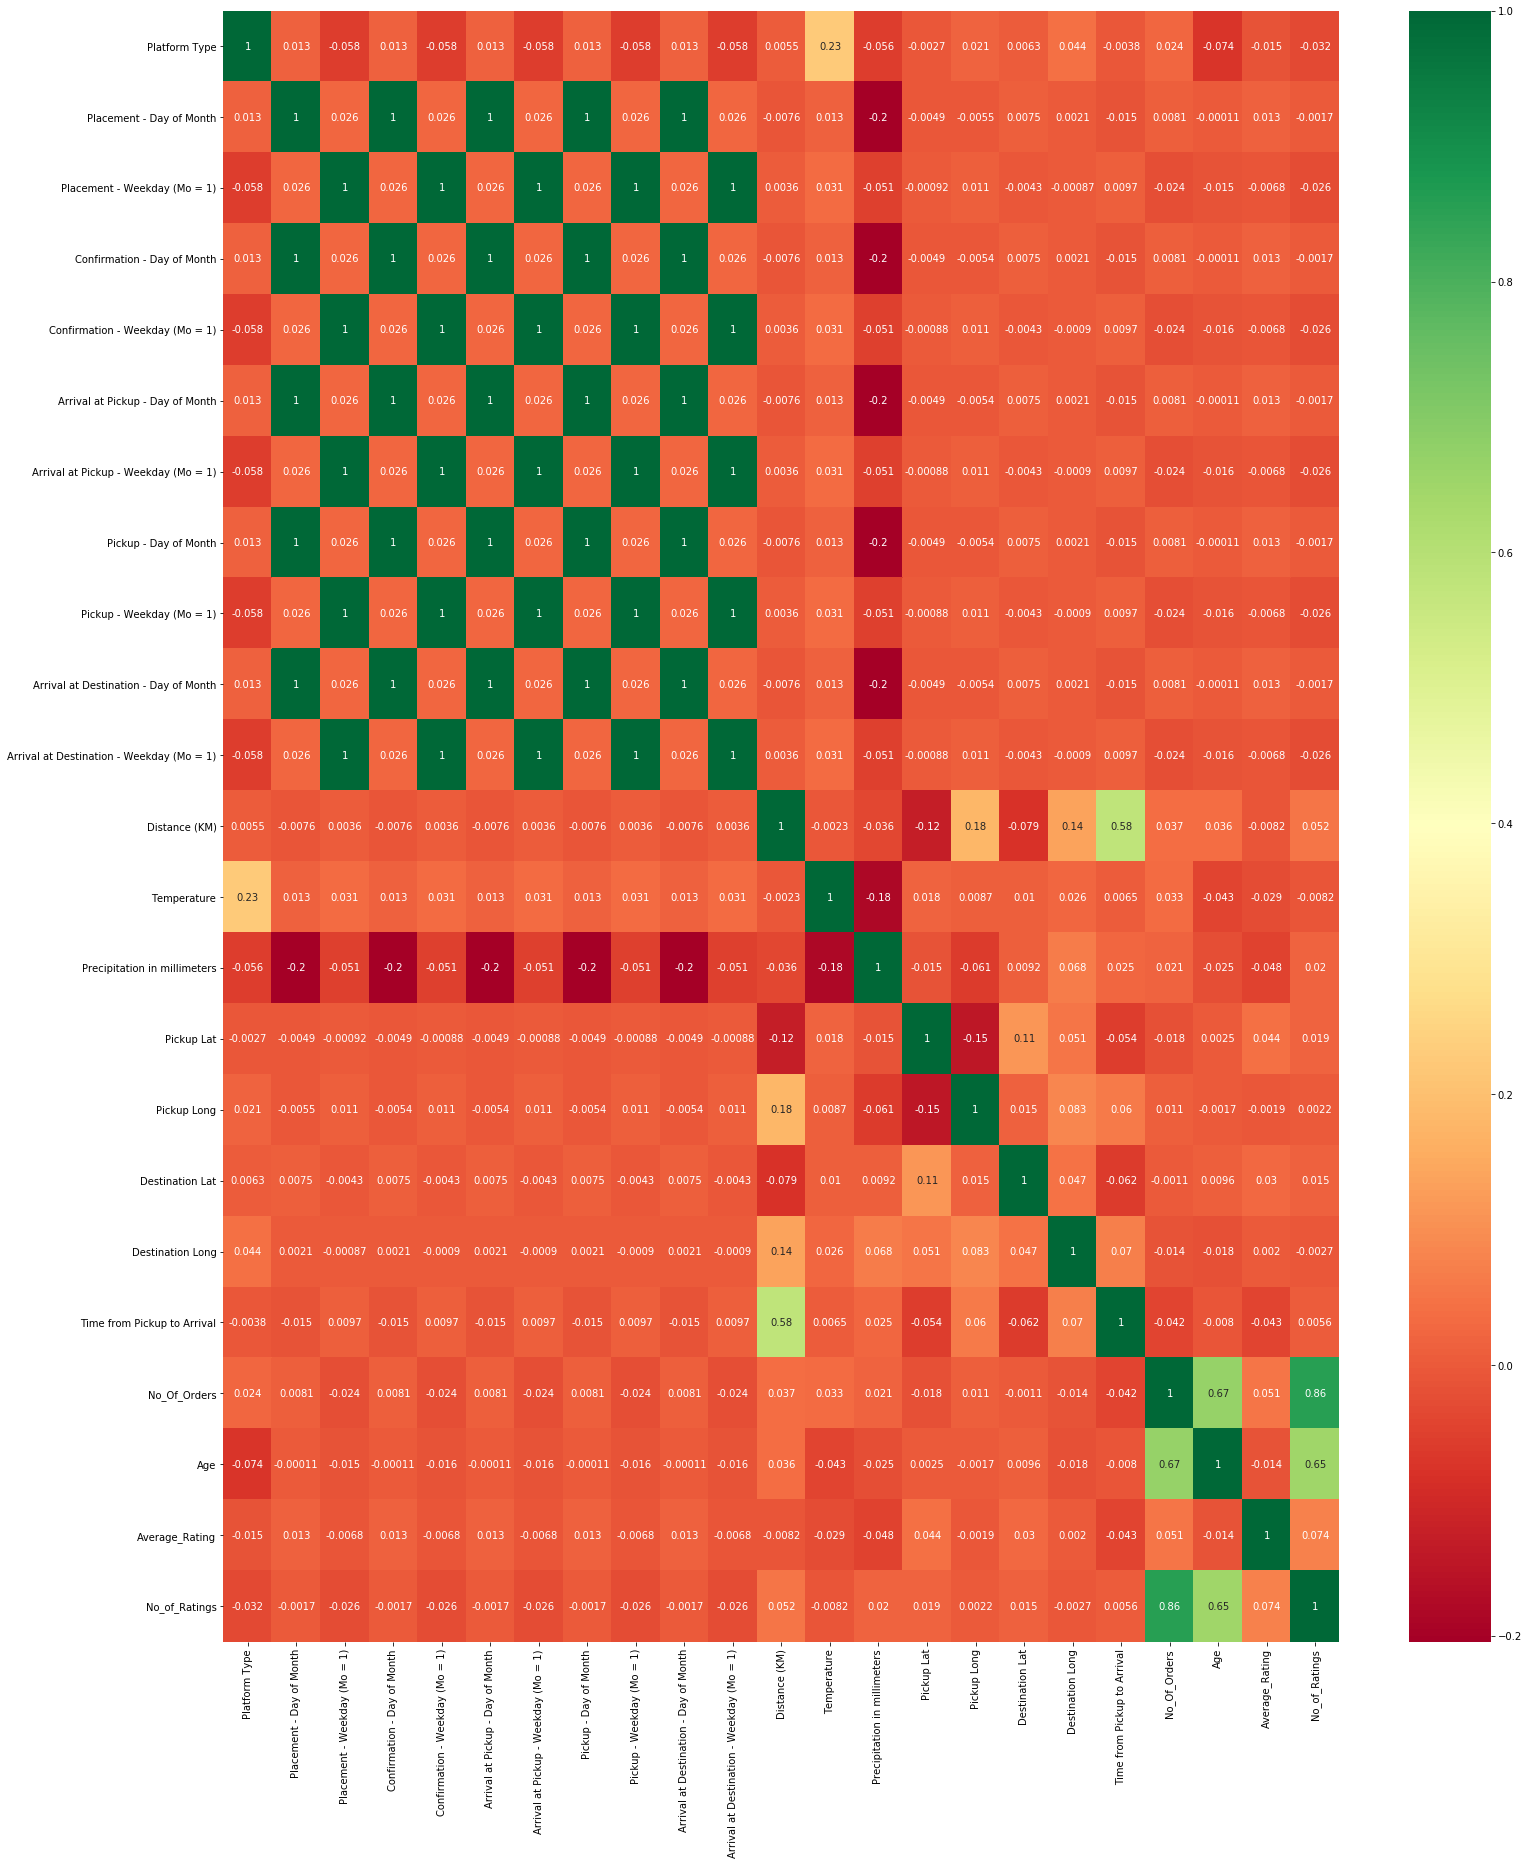

In [23]:
corrmat = train.corr()
top_corr_features = corrmat.index
rcParams['figure.figsize'] = 25, 30
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#### Platform Histogram

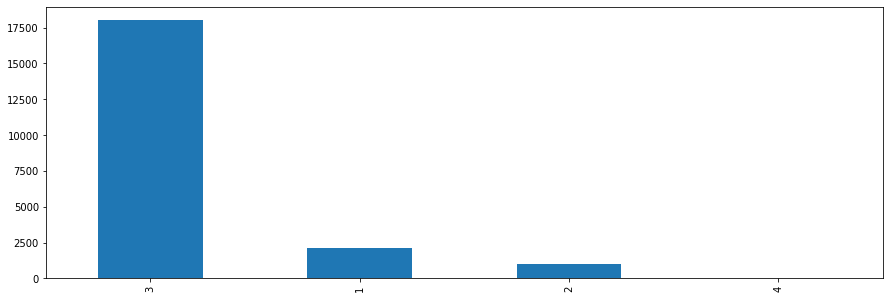

In [24]:
train['Platform Type'].value_counts().plot(kind='bar',figsize=[15,5])

#### Temperature Histogram

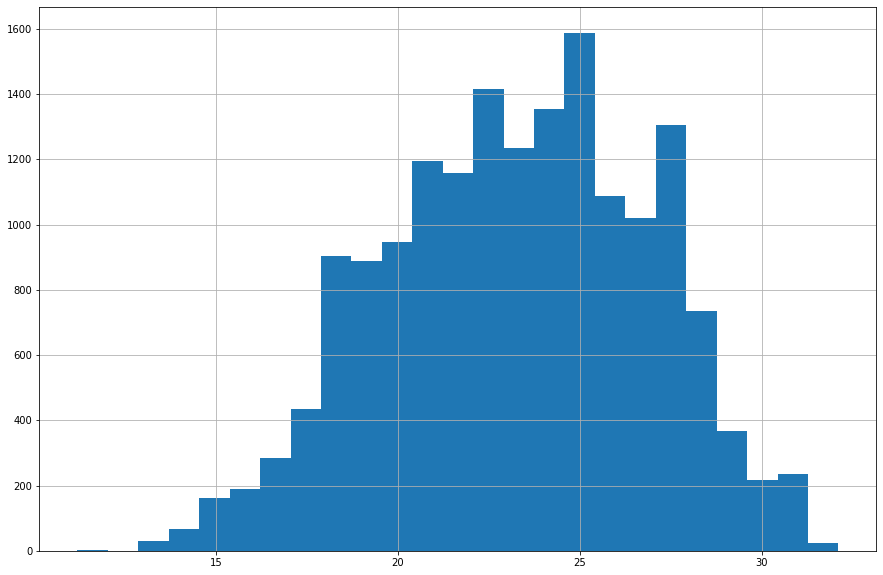

In [25]:
train['Temperature'].hist(bins=25,figsize=[15,10])

#### Personal or Business Histogram


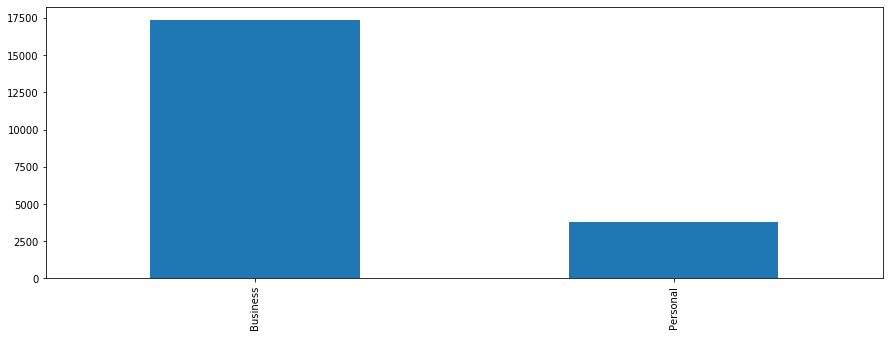

In [26]:
train['Personal or Business'].value_counts().plot(kind='bar',figsize=[15,5])

#### Arrival at Pickup Day of Month

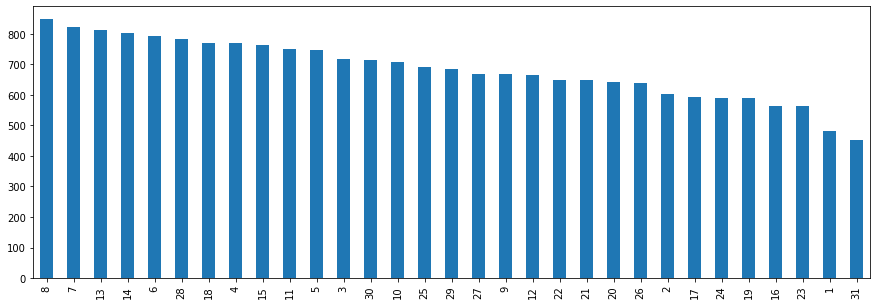

In [27]:
train['Arrival at Pickup - Day of Month'].value_counts().plot(kind='bar',figsize=[15,5])

#### Arrival at Pickup Weekday

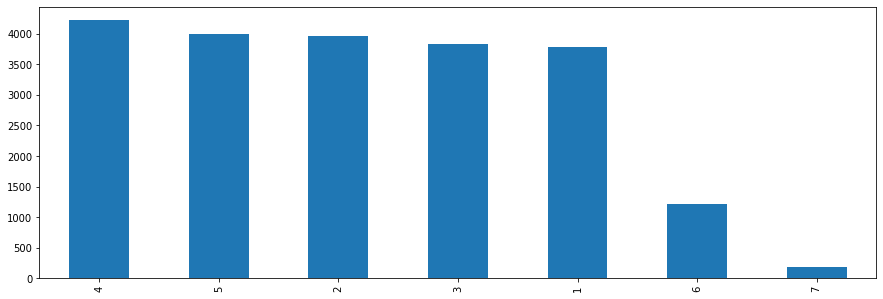

In [28]:
train['Arrival at Pickup - Weekday (Mo = 1)'].value_counts().plot(kind='bar',figsize=[15,5])

In [29]:
train['Pickup - Time'] = pd.to_datetime(train['Pickup - Time'])
train['Arrival at Destination - Time'] = pd.to_datetime(train['Arrival at Destination - Time'])

In [30]:
train['Pickup_Hour'] = train['Pickup - Time'].dt.hour
train['Pickup_Minutes'] = train['Pickup - Time'].dt.minute
train['Pickup_Seconds'] = train['Pickup - Time'].dt.second
train['Arrival_Destination_Hour'] = train['Arrival at Destination - Time'].dt.hour
train['Arrival_Destination_Minutes'] = train['Arrival at Destination - Time'].dt.minute
train['Arrival_Destination_Seconds'] = train['Arrival at Destination - Time'].dt.second

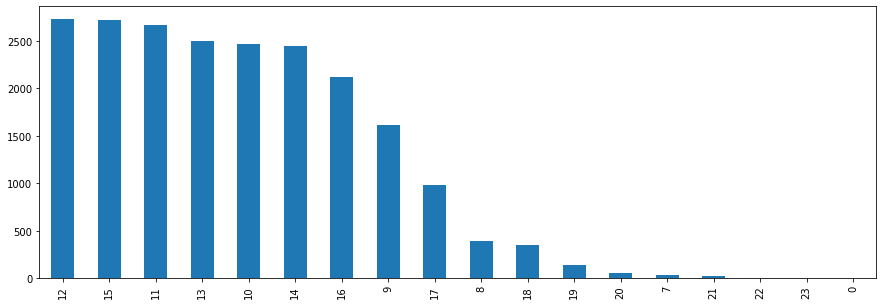

In [31]:
train['Pickup_Hour'].value_counts().plot(kind='bar',figsize=[15,5])


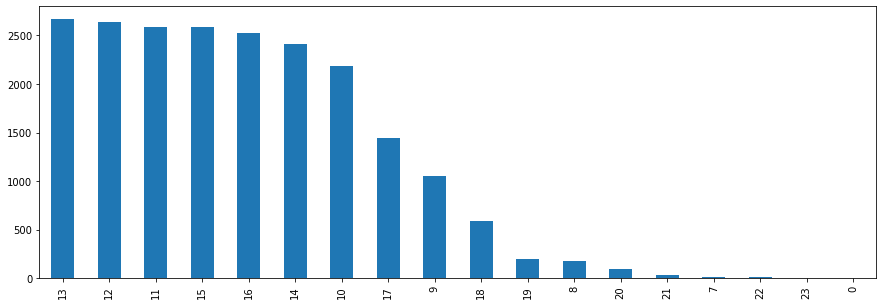

In [32]:
train['Arrival_Destination_Hour'].value_counts().plot(kind='bar',figsize=[15,5])


In [33]:
train['Time_from_Pickup_to_Arrival_Minutes'] = train['Time from Pickup to Arrival']/60


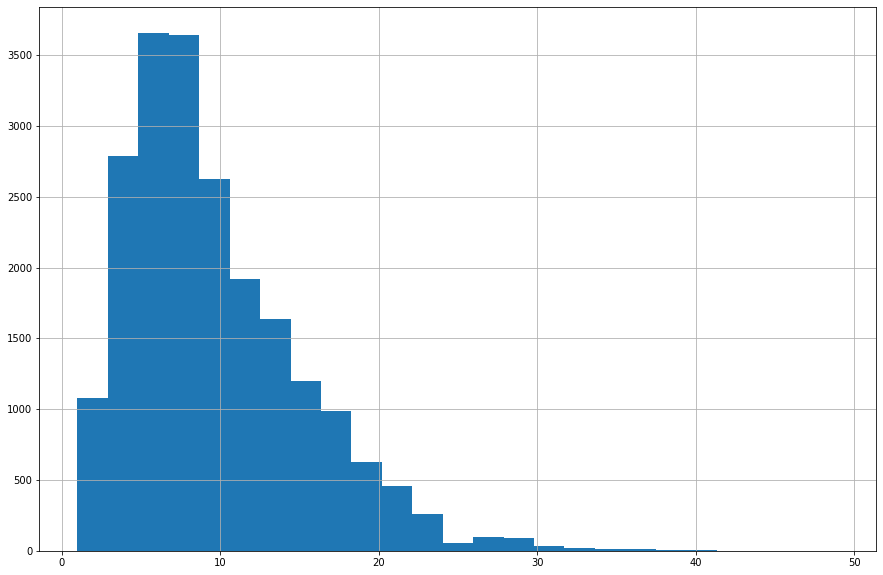

In [34]:
train['Distance (KM)'].hist(bins=25,figsize=[15,10])


In [35]:
train['Speed_Meter_per_Second'] = (train['Distance (KM)']*1000)/train['Time from Pickup to Arrival'] 

In [36]:
train.Speed_Meter_per_Second.describe().T

count    21201.000000
mean        69.251494
std        529.249252
min          0.255624
25%          4.573171
50%          6.406834
75%          8.413462
max      17000.000000
Name: Speed_Meter_per_Second, dtype: float64

#### Outlier  Free Speed

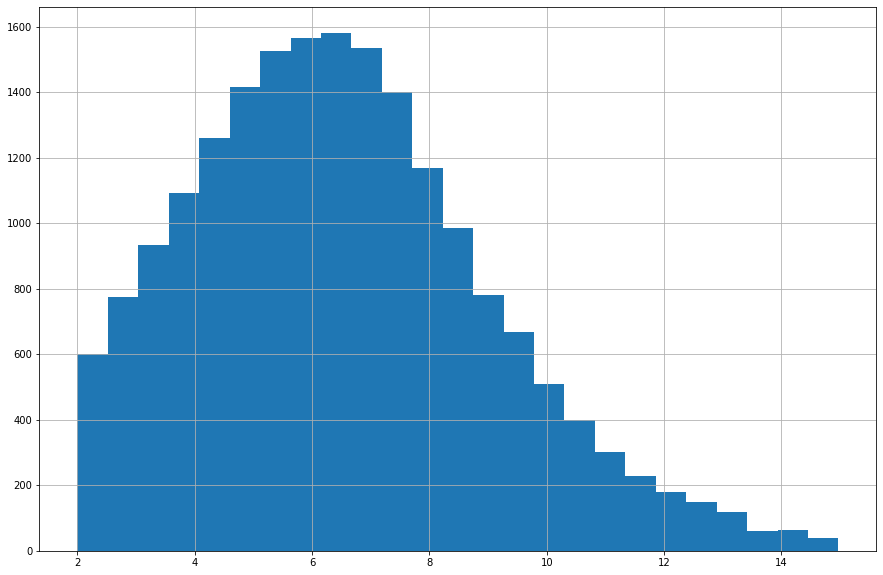

In [37]:
OutliersTrain = train[(train.Speed_Meter_per_Second>=15)|(train.Speed_Meter_per_Second<=2)]
OutlierFreeTrain = train[~(train['Order No'].isin(OutliersTrain['Order No']))]
hist_Speedmin = OutlierFreeTrain['Speed_Meter_per_Second'].hist(bins=25,figsize=[15,10])

In [38]:
print('We have probably %i outliers , we might have classified a few normal ones as outliers though.'%(len(OutliersTrain)))


We have probably 1856 outliers , we might have classified a few normal ones as outliers though.


In [39]:
OutlierFreeTrain.Speed_Meter_per_Second.describe()


count    19345.000000
mean         6.517542
std          2.506272
min          2.000667
25%          4.662005
50%          6.324111
75%          8.064516
max         14.970060
Name: Speed_Meter_per_Second, dtype: float64